In [1]:
import os
import cv2
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False
from func import *

In [2]:
column_names = ['img_name', 'average', 'sd', 'score']

val_df = pd.read_csv('val_df.csv', names=column_names, header=0)
bright_df = pd.read_csv('bright_df.csv', names=column_names, header=0)
dark_df = pd.read_csv('dark_df.csv', names=column_names, header=0)

## Laplacian

In [3]:
# 이미지별로 라플라시안 분산 계산
result_dict = {}
folder_path = 'val2017/'

for filename in os.listdir(folder_path):
    if filename.endswith(('.png', '.jpg', '.jpeg')):
        image_path = os.path.join(folder_path, filename)
        variance = calculate_laplacian_variance(image_path)
        result_dict[filename] = variance

In [4]:
result_dict = dict(sorted(result_dict.items(), key=lambda item:item[1]))

<Axes: >

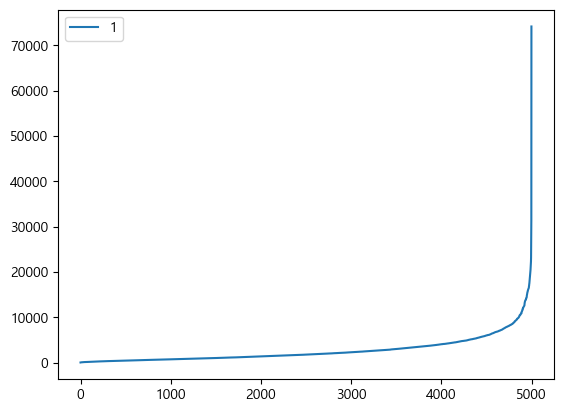

In [5]:
lapla_var_df = pd.DataFrame(list(result_dict.items()))
lapla_var_df.plot()

In [12]:
small_var = lapla_var_df[lapla_var_df[1]<4800]
large_var = lapla_var_df[lapla_var_df[1]>4800]

In [13]:
small_var

,0,1
0,000000459809.jpg,11.507188
1,000000430875.jpg,17.650189
2,000000496409.jpg,23.989195
3,000000182021.jpg,28.241666
4,000000187745.jpg,30.049171
...,...,...
4250,000000113354.jpg,4781.258764
4251,000000100274.jpg,4788.976401
4252,000000329447.jpg,4796.129706
4253,000000384527.jpg,4796.898219


In [86]:
# 이미지 읽기 (흑백으로 변환)
image = cv2.imread('val2017/000000329447.jpg', cv2.IMREAD_GRAYSCALE)

# 라플라시안 필터 적용
laplacian = cv2.Laplacian(image, cv2.CV_64F)

In [87]:
laplacian

array([[ -68.,  -14.,  -16., ...,   15.,    7.,   -6.],
       [  -6.,   27.,   13., ...,  -12.,   -4.,   13.],
       [  -8.,   30.,   26., ...,   20.,   13.,  -15.],
       ...,
       [ -71.,   73.,   75., ..., -215.,   64.,   -4.],
       [   8.,    5.,   49., ...,  125.,   17.,  -78.],
       [ -88.,  -10.,  -92., ...,   67.,   72.,  -50.]])

shape (480, 640)


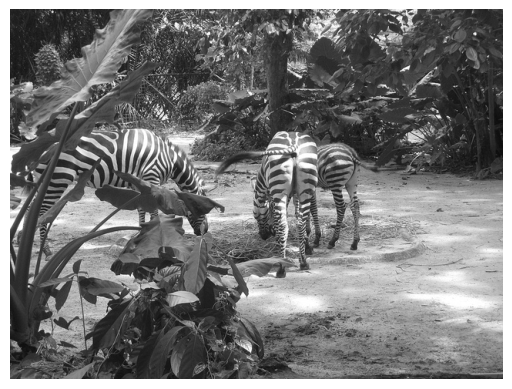

In [15]:
# 이미지 읽기
image = cv2.imread('val2017/000000113354.jpg', cv2.IMREAD_GRAYSCALE)
print("shape", image.shape)
plt.axis(False)
plt.imshow(image, cmap="gray")

shape (457, 640)


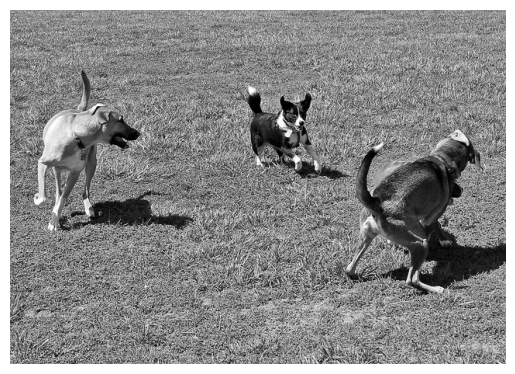

In [98]:
# 이미지 읽기
image = cv2.imread('val2017/000000269113.jpg', cv2.IMREAD_GRAYSCALE)
print("shape", image.shape)
plt.axis(False)
plt.imshow(image, cmap="gray")

In [17]:
val_df

,img_name,average,sd,score
0,val2017/000000477805.jpg,0.000000,0.097756,0.626568
1,val2017/000000155051.jpg,0.026389,0.190174,0.000874
2,val2017/000000200152.jpg,0.071706,0.352910,0.000522
3,val2017/000000232684.jpg,0.084821,0.581450,0.616019
4,val2017/000000255749.jpg,0.085086,0.361548,0.842190
...,...,...,...,...
3830,val2017/000000144114.jpg,0.945239,0.383551,0.558275
3831,val2017/000000051610.jpg,0.948538,0.563272,0.714039
3832,val2017/000000289229.jpg,0.952034,0.313611,0.849983
3833,val2017/000000492968.jpg,0.960530,0.520566,0.838667


In [35]:
lapla_var_df = lapla_var_df.set_axis(['img_name', 'laplacian_var'], axis=1)

In [56]:
val_df['img_name'] = val_df['img_name'].str.replace('val2017/', '')
merged_df = pd.merge(val_df, lapla_var_df, on='img_name', how='inner')
merged_df

,img_name,average,sd,score,laplacian_var
0,000000477805.jpg,0.000000,0.097756,0.626568,74.992173
1,000000155051.jpg,0.026389,0.190174,0.000874,58.773685
2,000000200152.jpg,0.071706,0.352910,0.000522,3030.163475
3,000000232684.jpg,0.084821,0.581450,0.616019,1133.270444
4,000000255749.jpg,0.085086,0.361548,0.842190,1246.172877
...,...,...,...,...,...
3830,000000144114.jpg,0.945239,0.383551,0.558275,846.989579
3831,000000051610.jpg,0.948538,0.563272,0.714039,1098.611867
3832,000000289229.jpg,0.952034,0.313611,0.849983,1132.619018
3833,000000492968.jpg,0.960530,0.520566,0.838667,1532.428993


In [89]:
# 이미지 읽기
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Sobel 필터를 사용하여 그라디언트 계산
grad_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
grad_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

# 그라디언트의 표준편차 계산
gradient_magnitude = np.sqrt(grad_x**2 + grad_y**2)
gradient_variance = np.var(gradient_magnitude)

gradient_variance

15039.583095524224

In [81]:
merged_df.sort_values('score').reset_index(drop=True)

,img_name,average,sd,score,laplacian_var
0,000000284282.jpg,0.480906,0.469825,0.000120,1210.268500
1,000000234807.jpg,0.244609,0.228017,0.000178,1955.848726
2,000000460229.jpg,0.454696,0.550635,0.000182,2386.330931
3,000000180798.jpg,0.487252,0.409970,0.000192,2552.119395
4,000000374727.jpg,0.511782,0.700491,0.000208,6472.917081
...,...,...,...,...,...
3830,000000356505.jpg,0.713036,0.436796,0.942072,2383.066248
3831,000000430961.jpg,0.425734,0.552731,0.942484,522.862879
3832,000000025393.jpg,0.161091,0.355986,0.943251,489.600692
3833,000000127270.jpg,0.578783,0.462866,0.961550,1622.280173


In [84]:
# 상관관계 계산
correlation_matrix = merged_df.drop('img_name', axis=1).corr()

# 특정 두 열 간의 상관관계
correlation_column1_column2 = merged_df['score'].corr(merged_df['laplacian_var'])

# 전체 상관관계 행렬 출력
print("Correlation Matrix:")
print(correlation_matrix)

# 특정 열 간의 상관관계 출력
print(f"\nCorrelation between Column1 and Column2: {correlation_column1_column2}")

Correlation Matrix:
                average        sd     score  laplacian_var
average        1.000000  0.104693  0.038455       0.056726
sd             0.104693  1.000000 -0.002013       0.230377
score          0.038455 -0.002013  1.000000      -0.038257
laplacian_var  0.056726  0.230377 -0.038257       1.000000

Correlation between Column1 and Column2: -0.03825718195184962


In [124]:
def detect_blur_in_patches(image_path, patch_size=(50, 50), threshold=100):
    # 이미지 읽기
    image = cv2.imread(image_path)

    # 이미지의 높이와 너비
    height, width, _ = image.shape

    # 패치 단위로 이미지를 검사
    for y in range(0, height, patch_size[1]):
        for x in range(0, width, patch_size[0]):
            # 현재 패치 추출
            patch = image[y:y+patch_size[1], x:x+patch_size[0]]

            # 라플라시안 변화 계산
            laplacian = cv2.Laplacian(patch, cv2.CV_64F)

            # 변화의 표준편차 계산
            laplacian_variance = np.var(laplacian)

            # 흐림 여부 판단
            if laplacian_variance < threshold:
                print(f"흐린 패치 ({x}, {y}) - ({x+patch_size[0]}, {y+patch_size[1]})")
                
                # 흐린 패치를 이미지로 출력
                cv2.imshow("Blurred Patch", patch) #
                cv2.waitKey(0) #
                cv2.destroyAllWindows() #

if __name__ == "__main__":
    image_path = 'val2017/000000370270.jpg'  # 이미지 파일 경로로 변경
    patch_size = (50, 50)  # 패치 크기 설정
    detect_blur_in_patches(image_path, patch_size)

흐린 패치 (50, 0) - (100, 50)
흐린 패치 (100, 0) - (150, 50)
흐린 패치 (50, 50) - (100, 100)
흐린 패치 (100, 50) - (150, 100)
흐린 패치 (50, 100) - (100, 150)
흐린 패치 (100, 100) - (150, 150)
흐린 패치 (50, 150) - (100, 200)
흐린 패치 (100, 150) - (150, 200)
흐린 패치 (350, 450) - (400, 500)


In [119]:
image.iloc[200:250, 150:200]

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

shape (426, 640)


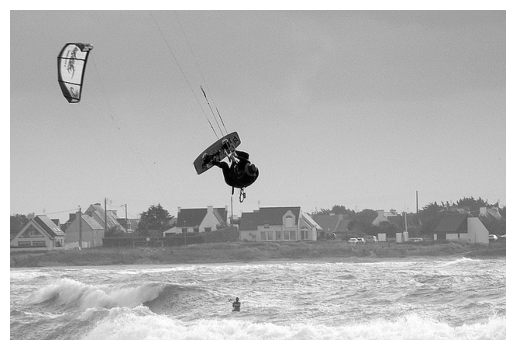

In [128]:
# 이미지 읽기
image = cv2.imread('val2017/000000532481.jpg', cv2.IMREAD_GRAYSCALE)
print("shape", image.shape)
plt.axis(False)
plt.imshow(image, cmap="gray")

In [111]:
small_var

,0,1
0,000000459809.jpg,11.507188
1,000000430875.jpg,17.650189
2,000000496409.jpg,23.989195
3,000000182021.jpg,28.241666
4,000000187745.jpg,30.049171
...,...,...
4250,000000113354.jpg,4781.258764
4251,000000100274.jpg,4788.976401
4252,000000329447.jpg,4796.129706
4253,000000384527.jpg,4796.898219


shape (426, 640)


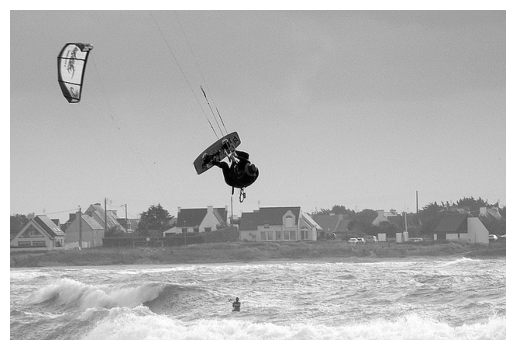

In [129]:
# 이미지 읽기
image = cv2.imread('val2017/000000532481.jpg', cv2.IMREAD_GRAYSCALE)
print("shape", image.shape)
plt.axis(False)
plt.imshow(image, cmap="gray")